# Mobile inverted pendulum python dynamics new

author:SeongHyeon Kim

program:PYDY balancing robot simulator


필요한 라이브러리 포함


In [1]:
from sympy import sin, cos, symbols, solve, Matrix, init_printing
from sympy.physics.mechanics import *
from sympy.physics.vector import ReferenceFrame
import sympy.physics.mechanics as me
import sympy as sm
import math as m
import numpy as np

In [2]:
init_vprinting()

# Reference frames

N은 외부의 기준 프레임. 속도를 0으로

In [3]:
#Newtonian reference frame
N=ReferenceFrame('N')

# Define a world coordinate origin
No = Point('No')
No.set_vel(N, 0)

In [4]:
F = ReferenceFrame('F')

P = ReferenceFrame('P')

F = N.orientnew('F', 'Axis',[psi, N.z] )     # Intermediate reference frame

P = F.orientnew('P', 'Axis', [theta, F.y])   # Inverted Pendulum

기준프레임.dcm(상대프레임)

## Newtonian, Bodies, Frames, Particles, Points


In [5]:
Mp =sm.symbols('Mp')
M = sm.symbols('M')

Po = me.Point('p_cm')
Lo = me.Point('L_cm')
body_l_f = me.ReferenceFrame('L_f')

Ro = me.Point('R_cm')
body_r_f = me.ReferenceFrame('R_f')

frame_f = me.ReferenceFrame('f')
Ip = me.Point('I_p')
LN = me.Point('ln')
RN = me.Point('rn')

## Variables, Constants and Specified


In [6]:
x = me.dynamicsymbols('x')            # F1> measure number of Velocity of P in N
xd = me.dynamicsymbols('x', 1)
xd2 = me.dynamicsymbols('x', 2)
theta = me.dynamicsymbols('theta')    # F2> measure number of Angular velocity of P in N
thetad = me.dynamicsymbols('theta', 1)
thetad2 = me.dynamicsymbols('theta', 2)
delta = me.dynamicsymbols('delta')    # N3> measure number of Angular velocity of P in N
deltad = me.dynamicsymbols('delta', 1)
deltad2 = me.dynamicsymbols('delta', 2)
wL = me.dynamicsymbols('wL')          # Angular velocity of L in N
wLd = me.dynamicsymbols('wL', 1)
wLd2 = me.dynamicsymbols('wL', 2)
wR = me.dynamicsymbols('wR')          # Angular velocity of R in N
wRd = me.dynamicsymbols('wR', 1)
wRd2 = me.dynamicsymbols('wR', 2)
TL, TR = me.dynamicsymbols('tL tR')   #Torques on L, R
g = sm.symbols('g', real=True)        #Gravitational acceleration
d = sm.symbols('d', real=True)        # Distance from point I to Lo (or Ro)
R = sm.symbols('r', real=True)        #Radius of wheels
l = sm.symbols('l', real=True)        # Distance from point I to mass center of P
t = sm.symbols('t')


# Create q and dq vectors
q = Matrix([x, theta, delta, wL, wR])
dq = q.diff()

## Mass and Inertia

관성모멘트함수=inertia(기준 좌표, xx, yy,zz회전)

In [7]:
K,J = symbols('K J')

In [8]:
I_L = inertia(F, K,J,K)                          #Wheel inertia 
I_R = inertia(F, K,J,K)


In [9]:
m_b = symbols('m_b')                              #Mass of the body
I1, I2, I3 = symbols('I1 I2 I3')                  #Moments of inertia of body

In [10]:
# Calculate inertia of body
Ib = inertia(F, I1, I2, I3)

###  Geometry relating unit vectors

In [11]:
F.orient(N, 'Axis', [delta, N.z])

In [12]:
P.orient(F, 'Axis', [theta, F.y])

In [13]:
N.dcm(F)

⎡cos(δ)  -sin(δ)  0⎤
⎢                  ⎥
⎢sin(δ)  cos(δ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

In [14]:
F.dcm(P)

⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦

## Position vectors

기준.locatenew('이름', 이동*단위백터)

P_No_I = x*F.x    # Point No to I
P_I_Po = l*P.z    # Point I to mass center of P
P_I_Lo = d*F.y    # Point I to center of wheel L
P_I_Ro = -d*F.y   # Point I to center of wheel R
P_Lo_LN = -R*F.z   # Center of wheel L to contact point LN
P_Ro_RN = -R*F.z   # Center of wheel R to contact point RN

In [15]:
I = No.locatenew('I', x*F.x)      # Point No to I

Po = I.locatenew('Po', l*P.z)     # Point I to mass center of P

Lo = I.locatenew('Lo', d*F.y)     # Point I to center of wheel L

Ro = I.locatenew('Ro', -d*F.y)    # Point I to center of wheel R

LN = Lo.locatenew('LN', -R*F.z)   # Center of wheel L to contact point LN

RN = Ro.locatenew('RN', -R*F.z)   # Center of wheel R to contact point RN

## Angular Velocities


In [16]:
F.set_ang_vel(N, deltad*N.z)        # Angular velocity of F in N
P.set_ang_vel(F, thetad*F.y)        # Angular velocity of P in F
body_l_f.set_ang_vel(F, wLd*F.y)    # wL is related to w and v due to rolling
body_r_f.set_ang_vel(F, wRd*F.y)    # wR is related to w and v due to rolling

## Velocities of relevant points

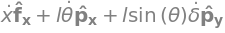

In [17]:
V_I_N = I.set_vel(N, xd*F.x)             # Velocity of point I in N

V_PO_N = Po.v2pt_theory(I,N,P)           # Velocity of center of mass of P

V_LO_N = Lo.v2pt_theory(I, N,P,)         # Velocity of center of L

V_RO_N = Ro.v2pt_theory(I,N,P)           # Velocity of center of R

V_LN_N = LN.v2pt_theory(Lo,N,body_l_f)          # Velocity of contact point of L

V_RN_N = RN.v2pt_theory(Ro,N,body_r_f)          # Velocity of contact point of R

V_PO_N


RigidBody =강체 선언 (입자로 저장된다고 한다)


 B = RigidBody ( '이름' ,질량 중심, 프레임 ,질량, ( I , P ))
 

In [18]:

body_p = me.RigidBody('p', Po, P, Mp, (Ib, Po))
body_l = me.RigidBody('l', Lo, body_l_f, M, (I_L, Lo))
body_r = me.RigidBody('r', Ro, body_r_f, M,(I_R, Ro))

### Forces

In [19]:
#중력벡터
Gravity = -g * N.z
fL = []

fL.extend([(P, -g*Mp*N.z),(Lo, -g*M*N.z),(Ro, -g*M*N.z)],)

In [20]:
fL.append((P, -TL*F.y))
fL.append((Lo, TL*F.y))     #Torques on L
fL.append((P, -TR*F.y))
fL.append((Ro, TR*F.y))    #Torques on R

fL
# Define forces on system:
T1, T2 = symbols('tau_1, tau_2')              # Torques from the wheels
fl = [(Lo, T1/R*P.y),
      (Ro, T2/R*P.y)]

## Nonholonomic Constranits

LN.vel(N)    N에서 측정한 LN(왼쪽 바퀴와 지면이 닿는점의 속도)


+.express(N)  N좌표계로 나타냄


+.args[0][0]   argument 의 약자 구성요소를 세분화 해서 저장 x y z 벡터 3가지 이므로 각각 순서대로 분리해서 저장한다.


In [21]:
# Express the velocity of points in the inertial frame
con1 = LN.vel(N).express(N).args[0][0]
con2 = RN.vel(N).express(N).args[0][0]
# Create a matrix of constraints
constraints = con1.col_join(con2)
constraints

⎡(-d⋅δ̇ - r⋅wL̇ + ẋ)⋅cos(δ)⎤
⎢                        ⎥
⎢(-d⋅δ̇ - r⋅wL̇ + ẋ)⋅sin(δ)⎥
⎢                        ⎥
⎢           0            ⎥
⎢                        ⎥
⎢(d⋅δ̇ - r⋅wṘ + ẋ)⋅cos(δ) ⎥
⎢                        ⎥
⎢(d⋅δ̇ - r⋅wṘ + ẋ)⋅sin(δ) ⎥
⎢                        ⎥
⎣           0            ⎦

In [22]:
con1

⎡(-d⋅δ̇ - r⋅wL̇ + ẋ)⋅cos(δ)⎤
⎢                        ⎥
⎢(-d⋅δ̇ - r⋅wL̇ + ẋ)⋅sin(δ)⎥
⎢                        ⎥
⎣           0            ⎦

In [23]:
LN.vel(N).args[0][0]

⎡-d⋅δ̇ - r⋅wL̇ + ẋ⎤
⎢               ⎥
⎢       0       ⎥
⎢               ⎥
⎣       0       ⎦

In [24]:
# Solve for dx, dy, and dtheta in terms of dphi1 and dphi2
sol = solve(constraints, dq[:3])

# Split the resulting dict into a rhs and lhs, that are equivalent
sol_rhs = Matrix(list(sol.values()))
sol_lhs = Matrix(list(sol.keys()))

# Since sol_rhs = sol_lhs --> sol_rhs - sol_lhs = 0
# This forms the basis of our constraint matrix.
# Combining, and solving for a linear representation:
c = (sol_rhs - sol_lhs).jacobian(dq[:5])

dq[:3]

In [25]:
sol

In [26]:
sol_rhs

⎡ r⋅wL̇   r⋅wṘ ⎤
⎢ ──── + ──── ⎥
⎢  2      2   ⎥
⎢             ⎥
⎢  r⋅wL̇   r⋅wṘ⎥
⎢- ──── + ────⎥
⎣  2⋅d    2⋅d ⎦

In [27]:
c

⎡            r    r ⎤
⎢-1  0  0    ─    ─ ⎥
⎢            2    2 ⎥
⎢                   ⎥
⎢           -r    r ⎥
⎢0   0  -1  ───  ───⎥
⎣           2⋅d  2⋅d⎦

In [28]:
# Constraint Equations
coneqs = (c*dq)
coneqs

⎡r⋅wL̇   r⋅wṘ     ⎤
⎢──── + ──── - ẋ ⎥
⎢ 2      2       ⎥
⎢                ⎥
⎢     r⋅wL̇   r⋅wṘ⎥
⎢-δ̇ - ──── + ────⎥
⎣     2⋅d    2⋅d ⎦

In [29]:
fL

[(P, - Mp*g*N.z),
 (Lo, - M*g*N.z),
 (Ro, - M*g*N.z),
 (P, - tL(t)*F.y),
 (Lo, tL(t)*F.y),
 (P, - tR(t)*F.y),
 (Ro, tR(t)*F.y)]

## Lagrangian equations of motion


In [30]:
Lag = Lagrangian(N, body_l, body_r, body_p)

In [31]:
Lag

In [32]:
lm = LagrangesMethod(Lag, q[:3], nonhol_coneqs=coneqs, forcelist=fL, frame=N)

In [33]:
le = lm.form_lagranges_equations()
le

⎡                                                  ⎛              2           
⎢          M⋅(-2⋅d⋅δ̈ + 2⋅ẍ)   M⋅(2⋅d⋅δ̈ + 2⋅ẍ)   Mp⋅⎝- 2⋅l⋅sin(θ)⋅θ̇  + 2⋅l
⎢          ──────────────── + ─────────────── + ──────────────────────────────
⎢                 2                  2                              2         
⎢                                                                             
⎢          ⎛   2                2                 ⎞      ⎛   2                
⎢       Mp⋅⎝2⋅l ⋅sin(θ)⋅cos(θ)⋅δ̇  - 2⋅l⋅sin(θ)⋅θ̇⋅ẋ⎠   Mp⋅⎝2⋅l ⋅θ̈ - 2⋅l⋅sin
⎢I₂⋅θ̈ - ─────────────────────────────────────────── + ───────────────────────
⎢                            2                                             2  
⎢                                                                             
⎢                                                           2    2            
⎣I₃⋅δ̈ + 2⋅K⋅δ̈ - M⋅d⋅(-d⋅δ̈ + ẍ) + M⋅d⋅(d⋅δ̈ + ẍ) + Mp⋅g + Mp⋅l ⋅sin (θ)⋅δ̈

          ⎞                  ⎤
⋅cos(θ)⋅θ̈ + 2⋅ẍ⎠  

In [34]:
le.simplify()

In [35]:
le

⎡                                 2                                          ⎤
⎢            2⋅M⋅ẍ - Mp⋅l⋅sin(θ)⋅θ̇  + Mp⋅l⋅cos(θ)⋅θ̈ + Mp⋅ẍ - lam₁            ⎥
⎢                                                                            ⎥
⎢                   2           2                                            ⎥
⎢               Mp⋅l ⋅sin(2⋅θ)⋅δ̇        2                                    ⎥
⎢        I₂⋅θ̈ - ───────────────── + Mp⋅l ⋅θ̈ + Mp⋅l⋅cos(θ)⋅ẍ + tL + tR        ⎥
⎢                       2                                                    ⎥
⎢                                                                            ⎥
⎢                    2                2    2            2                    ⎥
⎣I₃⋅δ̈ + 2⋅K⋅δ̈ + 2⋅M⋅d ⋅δ̈ + Mp⋅g + Mp⋅l ⋅sin (θ)⋅δ̈ + Mp⋅l ⋅sin(2⋅θ)⋅δ̇⋅θ̇ - lam₂⎦

In [36]:
lm.mass_matrix_full

⎡1  0  0       0            0                       0                  0  0⎤
⎢                                                                          ⎥
⎢0  1  0       0            0                       0                  0  0⎥
⎢                                                                          ⎥
⎢0  0  1       0            0                       0                  0  0⎥
⎢                                                                          ⎥
⎢0  0  0   2⋅M + Mp    Mp⋅l⋅cos(θ)                  0                  1  0⎥
⎢                                                                          ⎥
⎢                               2                                          ⎥
⎢0  0  0  Mp⋅l⋅cos(θ)  I₂ + Mp⋅l                    0                  0  0⎥
⎢                                                                          ⎥
⎢                                                   2       2    2         ⎥
⎢0  0  0       0            0       I₃ + 2⋅K + 2⋅M⋅d  + Mp⋅l ⋅sin (θ)  0  1⎥

In [37]:
lm.forcing_full

⎡                                   ẋ                                   ⎤
⎢                                                                       ⎥
⎢                                   θ̇                                   ⎥
⎢                                                                       ⎥
⎢                                   δ̇                                   ⎥
⎢                                                                       ⎥
⎢                                         2                             ⎥
⎢                            Mp⋅l⋅sin(θ)⋅θ̇                              ⎥
⎢                                                                       ⎥
⎢                     ⎛   2                2                 ⎞          ⎥
⎢                  Mp⋅⎝2⋅l ⋅sin(θ)⋅cos(θ)⋅δ̇  - 2⋅l⋅sin(θ)⋅θ̇⋅ẋ⎠          ⎥
⎢Mp⋅l⋅sin(θ)⋅θ̇⋅ẋ + ─────────────────────────────────────────── - tL - tR⎥
⎢                                       2                               ⎥
⎢                            

In [38]:
op_point = {x: 0, theta: 0, delta: 0}

In [39]:
lam_op = lm.solve_multipliers(op_point=op_point)

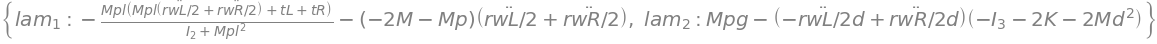

In [40]:
lam_op

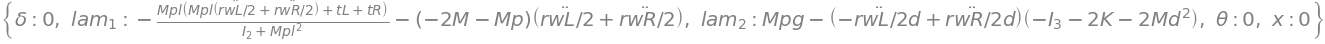

In [41]:
op_point.update(lam_op)
op_point

In [42]:
linearizer = lm.to_linearizer(op_point.update(lam_op))

ValueError: Must supply 0 dependent coordinates, and 2 dependent speeds

In [ ]:
A, B = linearizer.linearize( op_point=op_point)

In [ ]:
# Solve for the rhs:
rhs = lm.rhs()

# Substitute in d = 0
rhs = msubs(rhs, {x: 0, theta: 0, delta: 0})
rhs

In [ ]:
rhs.simplify()
rhs